## 1. Import libraries

# References:
1. https://www.kaggle.com/hely333/eda-regression

# Dataset
1. https://www.kaggle.com/marcinex1423/salesdb-grocery#salesDB_grocery_market.zip
1. https://www.kaggle.com/fayomi/advertising
2. https://www.kaggle.com/harlfoxem/housesalesprediction
3. https://github.com/awesomedata/awesome-public-datasets
4. https://www.kdnuggets.com/datasets/index.html
5. https://www.kaggle.com/devashish0507/big-mart-sales-prediction
6. https://archive.ics.uci.edu/ml/datasets/Statlog+(Vehicle+Silhouettes)

# 0.0 IMPORTS
---

In [3]:
import warnings
import pandas                  as pd
import seaborn                 as sns
import statsmodels.api         as sm
import statsmodels.formula.api as smf

from matplotlib              import pyplot as plt
from IPython.core.display    import HTML

from sklearn.model_selection import train_test_split
from sklearn.preprocessing   import LabelEncoder
from sklearn.ensemble        import RandomForestRegressor
from sklearn                 import linear_model
from sklearn                 import metrics

warnings.filterwarnings('ignore')

## 0.1. Helper Functions

In [4]:
# --- Jupyter Notebook Settings
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25,12]
    plt.rcParams['font.size'] = 24
    
    display( HTML( '<style>.container { width:100% !important; }</style>' ) )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()

In [5]:
jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


## 0.2. Loading Data

In [6]:
df_sales_raw = pd.read_csv( '../data/train.csv' )
df_stores_raw = pd.read_csv( '../data/store.csv' )

# Merge dataset
df_raw = pd.merge( df_sales_raw, df_stores_raw, on='Store', how='left' )

# 1.0. DATA PREPARATION
---

In [7]:
df_raw.sample(2)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
752437,598,1,2013-08-26,7831,914,1,1,0,1,c,a,550.0,12.0,2013.0,1,40.0,2014.0,"Jan,Apr,Jul,Oct"
432359,525,1,2014-06-09,0,0,0,0,a,0,d,c,1870.0,9.0,2013.0,0,NaN,NaN,NaN


## 1.1. Rename Attributes

In [8]:
df1 = df_raw.copy()

In [9]:
# new columns name
new_cols=['store', 'day_of_week', 'date', 'sales', 'customers', 'open', 'promo', 'state_holiday', 'school_holiday', 'store_type', 'assortment', 'competition_distance', 'competition_open_since_month', 
          'competition_open_since_year', 'promo2', 'promo2_since_week', 'promo2_since_year', 'promo_interval']

# rename
df1.columns = new_cols

In [10]:
df1.sample(2)

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,promo_interval
683162,453,7,2013-10-27,3543,448,1,0,0,0,a,c,75860.0,NaN,NaN,0,NaN,NaN,NaN
514923,579,4,2014-03-27,5985,758,1,0,0,0,c,a,20970.0,11.0,2012.0,0,NaN,NaN,NaN


# 2.0. DESCRIBE DATA
---

In [102]:
df2 = df1.copy()

## 2.1. Data Dimensions

In [103]:
print( 'Number of Rows: {}'.format( df2.shape[0] ) )
print( 'Number of Columns: {}'.format( df2.shape[1] ) )

Number of Rows: 1017209
Number of Columns: 18


## 2.2. Data Type Attributes

In [104]:
df2.dtypes

store                             int64
day_of_week                       int64
date                             object
sales                             int64
customers                         int64
open                              int64
promo                             int64
state_holiday                    object
school_holiday                    int64
store_type                       object
assortment                       object
competition_distance            float64
competition_open_since_month    float64
competition_open_since_year     float64
promo2                            int64
promo2_since_week               float64
promo2_since_year               float64
promo_interval                   object
dtype: object

In [105]:
# convert store to string because it's a id
df2['store'] = df2['store'].astype( str )

# convert to datetime
df2['date'] = pd.to_datetime( df2['date'] )

df2.dtypes

store                                   object
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
dtype: object

## 2.3. Number of NA

In [106]:
df2.isna().sum()

store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
store_type                           0
assortment                           0
competition_distance              2642
competition_open_since_month    323348
competition_open_since_year     323348
promo2                               0
promo2_since_week               508031
promo2_since_year               508031
promo_interval                  508031
dtype: int64

In [107]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
store                           1017209 non-null object
day_of_week                     1017209 non-null int64
date                            1017209 non-null datetime64[ns]
sales                           1017209 non-null int64
customers                       1017209 non-null int64
open                            1017209 non-null int64
promo                           1017209 non-null int64
state_holiday                   1017209 non-null object
school_holiday                  1017209 non-null int64
store_type                      1017209 non-null object
assortment                      1017209 non-null object
competition_distance            1014567 non-null float64
competition_open_since_month    693861 non-null float64
competition_open_since_year     693861 non-null float64
promo2                          1017209 non-null int64
promo2_since_week               509178 non-nu

## 2.4. Treat NA columns

In [108]:
df2.sample( 2 )

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,promo_interval
59842,748,1,2015-06-08,4900,458,1,0,0,0,d,a,2380.0,3.0,2010.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
827240,696,4,2013-06-20,7470,1036,1,1,0,1,a,c,430.0,NaN,NaN,0,NaN,NaN,NaN


In [109]:
# promo2_since_year
df2['promo2_since_year'] = df2.apply( lambda x: x['date'].year if math.isnan( x['promo2_since_year'] ) else x['promo2_since_year'], axis=1 )

# promo2_since_week
df2['promo2_since_week'] = df2.apply( lambda x: x['date'].weekofyear if math.isnan( x['promo2_since_week'] ) else x['promo2_since_week'], axis=1 )

# competition_distance
df2['competition_distance'] = df2['competition_distance'].apply( lambda x: 200000.0 if math.isnan( x ) else x )

# competition_open_since_month
df2['competition_open_since_month'] = df2.apply( lambda x: x['date'].month if math.isnan( x['competition_open_since_month'] ) else x['competition_open_since_month'], axis=1 ) 

# competition_open_since_year
df2['competition_open_since_year'] = df2.apply( lambda x: x['date'].year if math.isnan( x['competition_open_since_year'] ) else x['competition_open_since_year'], axis=1 )

# promo_interval
## fill na with 0
df2.fillna( 0, inplace=True )
# if date is in the promo interval, there is promo.
monthmap = {1:'Jan', 2:'Fev', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'}
df2['month_map'] = df2['date'].dt.month.map( monthmap )
df2['is_promo'] = df2[['promo_interval', 'month_map']].apply( lambda x: 0 if x['promo_interval'] == 0 else 1 if x['month_map'] in x['promo_interval'].split( ',' ) else 0, axis=1 )

In [111]:
df2.isna().sum()

store                           0
day_of_week                     0
date                            0
sales                           0
customers                       0
open                            0
promo                           0
state_holiday                   0
school_holiday                  0
store_type                      0
assortment                      0
competition_distance            0
competition_open_since_month    0
competition_open_since_year     0
promo2                          0
promo2_since_week               0
promo2_since_year               0
promo_interval                  0
month_map                       0
is_promo                        0
dtype: int64

## 2.5. Change the Columns Data Types

In [112]:
df2.dtypes

store                                   object
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
month_map                               object
is_promo                                 int64
dtype: object

In [113]:
# change competition data - Month and Year
df2['competition_open_since_month'] = df2['competition_open_since_month'].astype( int )
df2['competition_open_since_year'] = df2['competition_open_since_year'].astype( int )

# change competition data - Week
df2['promo2_since_week'] = df2['promo2_since_week'].astype( int )
df2['promo2_since_year'] = df2['promo2_since_year'].astype( int )

In [114]:
df2.dtypes

store                                   object
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month             int64
competition_open_since_year              int64
promo2                                   int64
promo2_since_week                        int64
promo2_since_year                        int64
promo_interval                          object
month_map                               object
is_promo                                 int64
dtype: object

## 2.6. Descriptive statistics

In [115]:
# separate the categorical from numerical features
num_attributes = df2.select_dtypes( include=['int64', 'float64'] )
cat_attributes = df2.select_dtypes( exclude=['int64', 'float64', 'datetime64[ns]'] )
dat_attributes = df2.select_dtypes( include=['datetime64[ns]'] )

print( 'Num of Categorical: {}'.format( cat_attributes.shape[1] ) )
print( 'Num of Numerical: {}'.format( num_attributes.shape[1] ) )
print( 'Num of Date: {}'.format( dat_attributes.shape[1] ) )

Num of Categorical: 6
Num of Numerical: 13
Num of Date: 1


### 2.6.1. Central Tendency and Dispersion 

#### 2.6.1.1. Numerical Attributes

In [116]:
# Meausure of Central Tendency
ct1 = pd.DataFrame( num_attributes.apply( mean ) ).T
ct2 = pd.DataFrame( num_attributes.apply( median ) ).T


# Dispersion
d1 = pd.DataFrame( num_attributes.apply( std ) ).T
d2 = pd.DataFrame( num_attributes.apply( min ) ).T
d3 = pd.DataFrame( num_attributes.apply( max ) ).T
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) ).T
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T

m = pd.concat( [ d2, d3, d4, ct1, ct2, d1, d5, d6] ).T.reset_index()
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'standard_deviation', 'kurtosis', 'skew']

m

,attributes,min,max,range,mean,median,standard_deviation,kurtosis,skew
0,day_of_week,1.0,7.0,6.0,3.998341,4.0,1.997390,-1.246873,0.001593
1,sales,0.0,41551.0,41551.0,5773.818972,5744.0,3849.924283,1.778375,0.641460
2,customers,0.0,7388.0,7388.0,633.145946,609.0,464.411506,7.091773,1.598650
3,open,0.0,1.0,1.0,0.830107,1.0,0.375539,1.090723,-1.758045
4,promo,0.0,1.0,1.0,0.381515,0.0,0.485758,-1.762018,0.487838
5,school_holiday,0.0,1.0,1.0,0.178647,0.0,0.383056,0.815154,1.677842
6,competition_distance,20.0,200000.0,199980.0,5935.442677,2330.0,12547.646829,147.789712,10.242344
7,competition_open_since_month,1.0,12.0,11.0,6.786849,7.0,3.311085,-1.232607,-0.042076
8,competition_open_since_year,1900.0,2015.0,115.0,2010.324840,2012.0,5.515591,124.071304,-7.235657
9,promo2,0.0,1.0,1.0,0.500564,1.0,0.500000,-1.999999,-0.002255


### 2.6.1.2. Categorical Attributes

In [117]:
c = pd.DataFrame( cat_attributes.apply( lambda x: x.unique().shape[0], axis=0 ).reset_index() )
c.columns = ['Columns Names', 'Number of Levels']
print( c )

    Columns Names  Number of Levels
0           store              1115
1   state_holiday                 5
2      store_type                 4
3      assortment                 3
4  promo_interval                 4
5       month_map                12


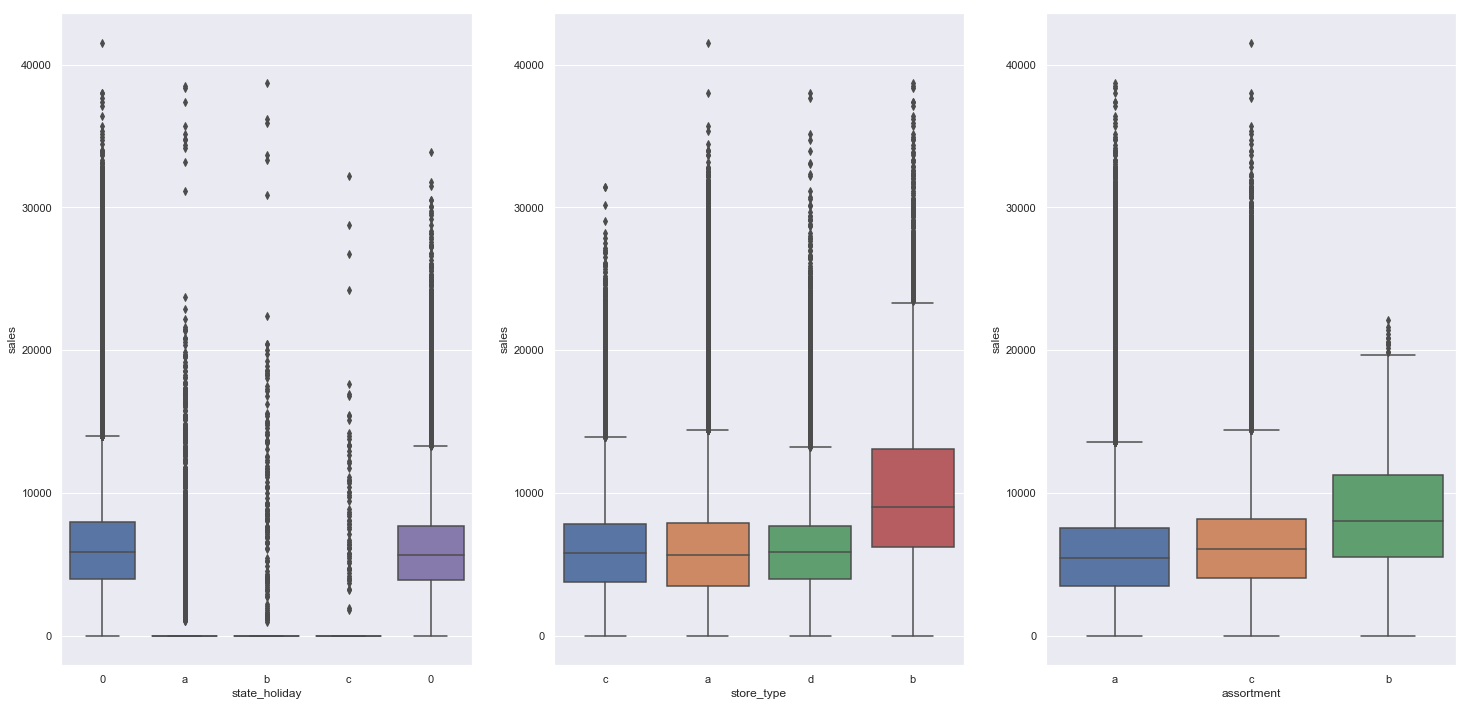

In [118]:
plt.subplot( 1, 3, 1 )
sns.boxplot( x='state_holiday', y='sales', data=df2 );

plt.subplot( 1, 3, 2 )
sns.boxplot( x='store_type', y='sales', data=df2 );

plt.subplot( 1, 3, 3 )
sns.boxplot( x='assortment', y='sales', data=df2 );

# 3.0. FEATURE ENGINEERING
---

In [145]:
df3 = df2.copy()

## 3.1. Feature Creation

In [146]:
# year
df3['year'] = df3['date'].dt.year

# month
df3['month'] = df3['date'].dt.month

# day
df3['day'] = df3['date'].dt.day

# week of year
df3['week_of_year'] = df3['date'].dt.weekofyear

# state_holiday
df3['state_holiday'] = df3['state_holiday'].apply( lambda x: 'public_holiday' if x == 'a' else 'easter_holiday' if x == 'b' else 'christmas' if x == 'c' else 'regular_day' ) 

# assortment
df3['assortment'] = df3['assortment'].apply( lambda x: 'basic' if x == 'a' else 'extra' if x == 'b' else 'extended' )

# competition weeks
df3['months_of_competition'] = 12*( df3['year'] - df3['competition_open_since_year'] ) + ( df3['month'] - df3['competition_open_since_month'] )
df3['months_of_competition'] = df3['months_of_competition'].apply( lambda x: x if x > 0 else 0 )

# promomotion weeks
df3['months_of_promo'] = 12*( df3['year'] - df3['promo2_since_year'] ) + ( df3['week_of_year'] - df3['promo2_since_week'] )/4
df3['months_of_promo'] = df3['months_of_promo'].apply( lambda x: x if x > 0 else 0 )

# 4.0. SELECT FEATURES

In [147]:
df4 = df3.copy()

## 4.1. Filtering Rows

In [148]:
df4 = df4[df4['open'] == 1]

## 4.2. Selecting Columns

**Columns to Drop**
1. **customers**: voce nao sabe o numero de clientes no momento da predicao
2. **open**: todas as linhas sao open

In [149]:
cols = ['store', 'day_of_week', 'year', 'month', 'day', 'week_of_year', 'sales', 'promo', 'state_holiday', 'school_holiday', 'store_type', 'assortment',
       'competition_distance', 'months_of_competition', 'promo2', 'is_promo', 'months_of_promo']

# selecting columns
df4 = df4[ cols ]

In [150]:
df4.sample( 4 )

,store,day_of_week,year,month,day,week_of_year,sales,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,months_of_competition,promo2,is_promo,months_of_promo
547648,969,3,2014,2,26,9,2971,0,regular_day,0,a,extended,600.0,171,1,0,11.75
688476,192,2,2013,10,22,43,7655,1,regular_day,0,d,extended,2770.0,67,1,1,0.00
951723,299,4,2013,2,28,9,4025,0,regular_day,0,d,extended,38630.0,5,0,0,0.00
110259,990,5,2015,4,24,17,6018,0,regular_day,0,d,basic,20930.0,0,0,0,0.00


In [151]:
df4[df4['store'] == '137'].sort_values( ['year', 'month', 'day'] )

,store,day_of_week,year,month,day,week_of_year,sales,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,months_of_competition,promo2,is_promo,months_of_promo
1015116,137,3,2013,1,2,1,9651,0,regular_day,1,a,basic,1730.0,0,1,1,0.00
1014001,137,4,2013,1,3,1,7526,0,regular_day,1,a,basic,1730.0,0,1,1,0.00
1012886,137,5,2013,1,4,1,8224,0,regular_day,1,a,basic,1730.0,0,1,1,0.00
1011771,137,6,2013,1,5,1,5054,0,regular_day,0,a,basic,1730.0,0,1,1,0.00
1009541,137,1,2013,1,7,2,10753,1,regular_day,0,a,basic,1730.0,0,1,1,0.00
1008426,137,2,2013,1,8,2,9404,1,regular_day,0,a,basic,1730.0,0,1,1,0.00
1007311,137,3,2013,1,9,2,8620,1,regular_day,0,a,basic,1730.0,0,1,1,0.00
1006196,137,4,2013,1,10,2,6995,1,regular_day,0,a,basic,1730.0,0,1,1,0.00
1005081,137,5,2013,1,11,2,8840,1,regular_day,0,a,basic,1730.0,0,1,1,0.00
1003966,137,6,2013,1,12,2,6516,0,regular_day,0,a,basic,1730.0,0,1,1,0.00


# 4.0. DATA AGGREGATION
---

# 3.0. EDA - Exploration Data Analysis
---

In [50]:
df3 = df2.copy()

## 3.1. Univariate Analysis

## 3.1.1. Response Variable

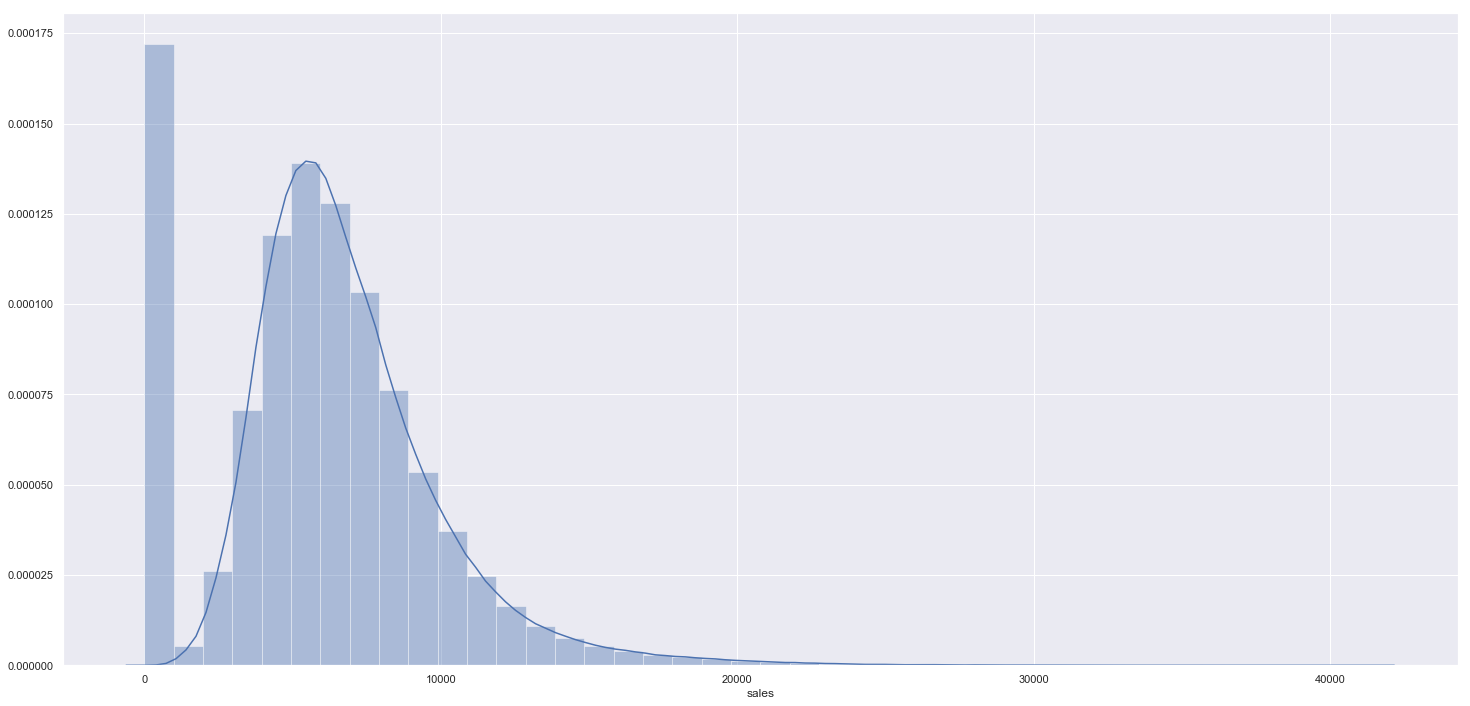

In [51]:
sns.distplot( df3['sales'], kde=True, bins=42 )

## 3.1.2. Numerical Predictors

In [52]:
num_attributes.head()

,day_of_week,sales,customers,open,promo,school_holiday,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,promo_interval
0,5,5263,555,1,1,1,1270.0,9,2008,0,31,2015,0
1,5,6064,625,1,1,1,570.0,11,2007,1,13,2010,0
2,5,8314,821,1,1,1,14130.0,12,2006,1,14,2011,0
3,5,13995,1498,1,1,1,620.0,9,2009,0,31,2015,0
4,5,4822,559,1,1,1,29910.0,4,2015,0,31,2015,0


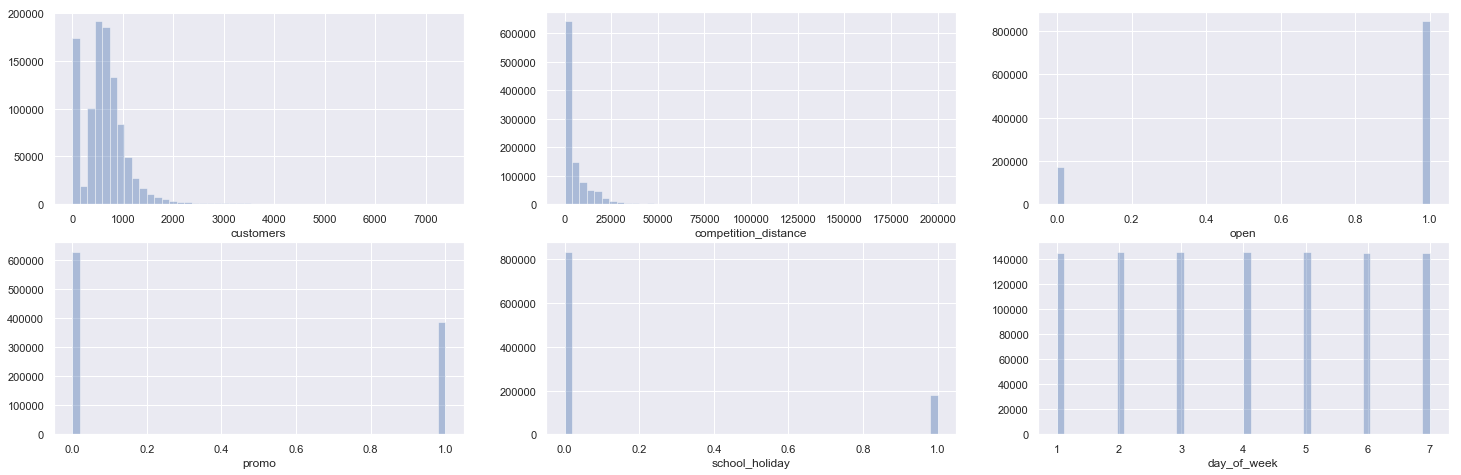

In [53]:
plt.subplot( 3, 3, 1 )
sns.distplot( df3['customers'], kde=False );

plt.subplot( 3, 3, 2 )
sns.distplot( df3['competition_distance'], kde=False );

plt.subplot( 3, 3, 3 )
sns.distplot( df3['open'], kde=False );

plt.subplot( 3, 3, 4 )
sns.distplot( df3['promo'], kde=False );

plt.subplot( 3, 3, 5 )
sns.distplot( df3['school_holiday'], kde=False );

plt.subplot( 3, 3, 6 )
sns.distplot( df3['day_of_week'], kde=False );

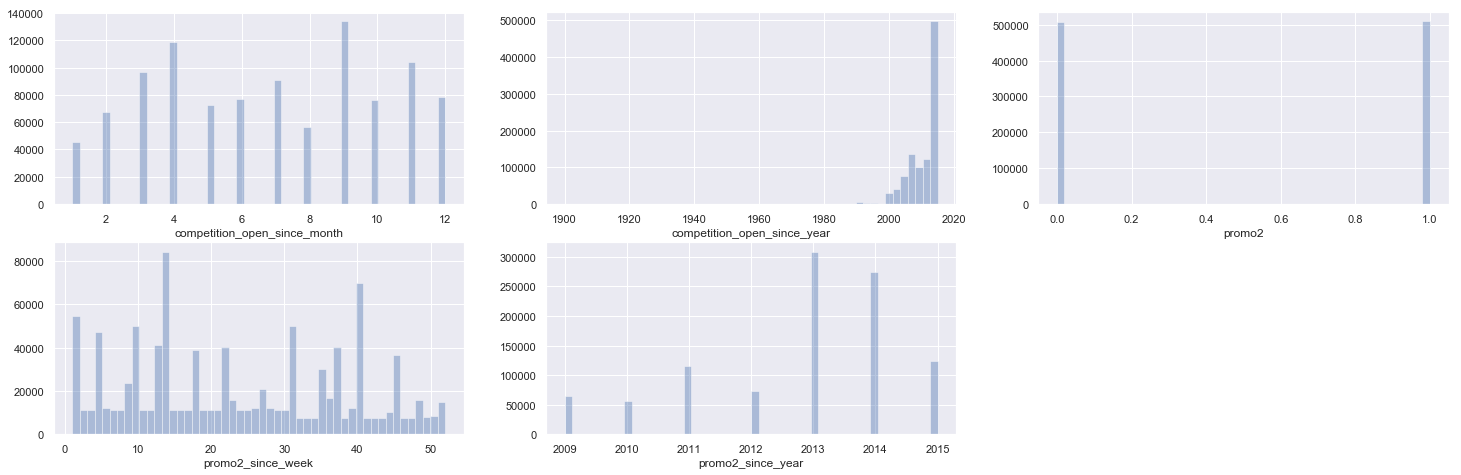

In [54]:
plt.subplot( 3, 3, 1 )
sns.distplot( df3['competition_open_since_month'], kde=False );

plt.subplot( 3, 3, 2 )
sns.distplot( df3['competition_open_since_year'], kde=False );

plt.subplot( 3, 3, 3 )
sns.distplot( df3['promo2'], kde=False );

plt.subplot( 3, 3, 4 )
sns.distplot( df3['promo2_since_week'], kde=False );

plt.subplot( 3, 3, 5 )
sns.distplot( df3['promo2_since_year'], kde=False );

## 3.1.3. Categorical Predictors

In [55]:
cat_attributes.head()

,store,state_holiday,store_type,assortment
0,1,0,c,a
1,2,0,a,a
2,3,0,a,a
3,4,0,c,c
4,5,0,a,a


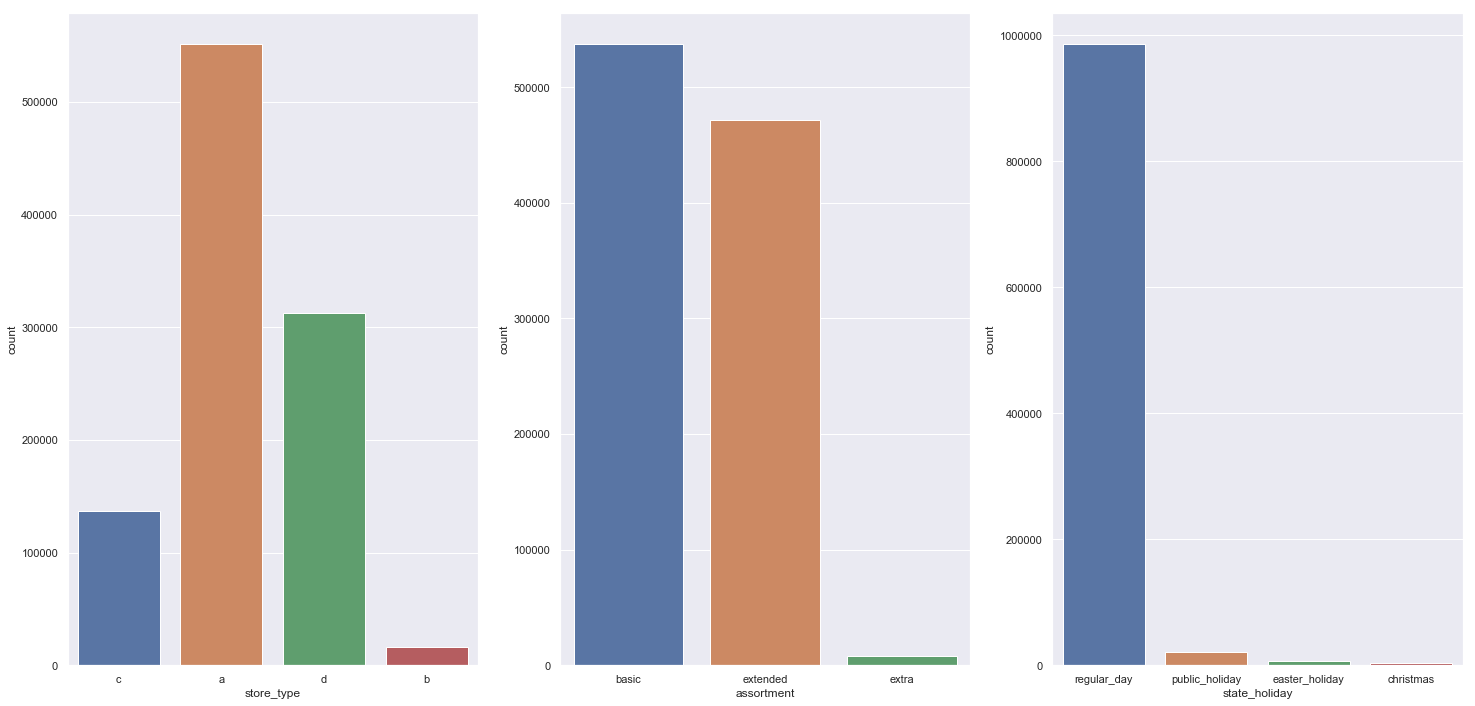

In [56]:
plt.subplot( 1, 3, 1 )
sns.countplot( x='store_type', data=df3 )

plt.subplot( 1, 3, 2 )
sns.countplot( x='assortment', data=df3 )

plt.subplot( 1, 3, 3 )
sns.countplot( x='state_holiday', data=df3 )

## 3.2. Bivariate Analysis

In [57]:
df3.head(2)

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,promo_interval
0,1,5,2015-07-31,5263,555,1,1,regular_day,1,c,basic,1270.0,9,2008,0,31,2015,0
1,2,5,2015-07-31,6064,625,1,1,regular_day,1,a,basic,570.0,11,2007,1,13,2010,0


## 3.2.1. Numerical Predictors

In [58]:
num_attributes.head()

,day_of_week,sales,customers,open,promo,school_holiday,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,promo_interval
0,5,5263,555,1,1,1,1270.0,9,2008,0,31,2015,0
1,5,6064,625,1,1,1,570.0,11,2007,1,13,2010,0
2,5,8314,821,1,1,1,14130.0,12,2006,1,14,2011,0
3,5,13995,1498,1,1,1,620.0,9,2009,0,31,2015,0
4,5,4822,559,1,1,1,29910.0,4,2015,0,31,2015,0


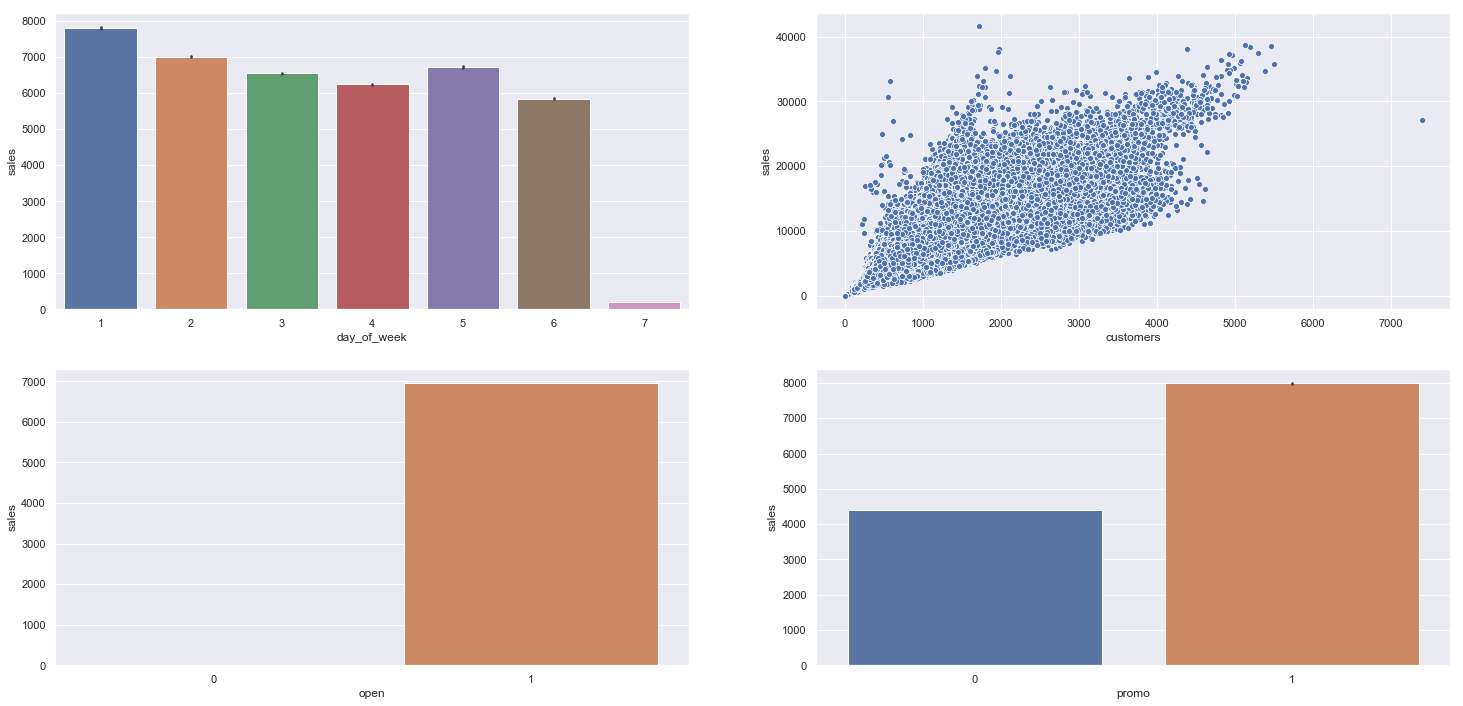

In [59]:
# day of week x sales
plt.subplot( 2, 2, 1 )
sns.barplot( x='day_of_week', y='sales', data=df3 );

# customers x sales 
plt.subplot( 2, 2, 2 )
sns.scatterplot( x='customers', y='sales', data=df3 );

# open x sales
plt.subplot( 2, 2, 3 )
sns.barplot( x='open', y='sales', data=df3 );

# promo x sales
plt.subplot( 2, 2, 4 )
sns.barplot( x='promo', y='sales', data=df3 );

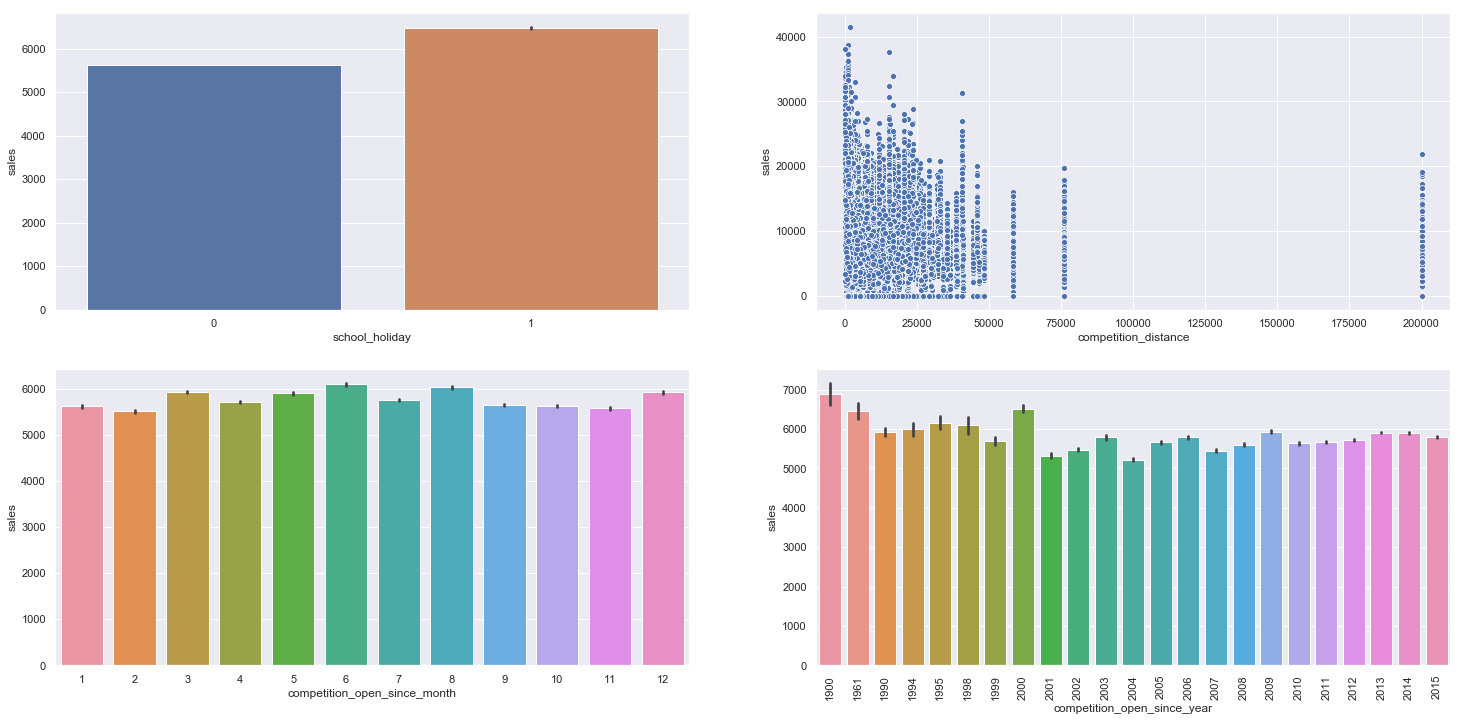

In [60]:
# school holiday x sales
plt.subplot( 2, 2, 1 )
sns.barplot( x='school_holiday', y='sales', data=df3 );

# competition distance x sales 
plt.subplot( 2, 2, 2 )
sns.scatterplot( x='competition_distance', y='sales', data=df3 );

# competition open since month x sales
plt.subplot( 2, 2, 3 )
sns.barplot( x='competition_open_since_month', y='sales', data=df3 );

# competition open since year x sales
plt.subplot( 2, 2, 4 )
sns.barplot( x='competition_open_since_year', y='sales', data=df3 );
plt.xticks( rotation=90 );

## 3.2.2. Categorical Predictors

In [61]:
cat_attributes.head()

,store,state_holiday,store_type,assortment
0,1,0,c,a
1,2,0,a,a
2,3,0,a,a
3,4,0,c,c
4,5,0,a,a


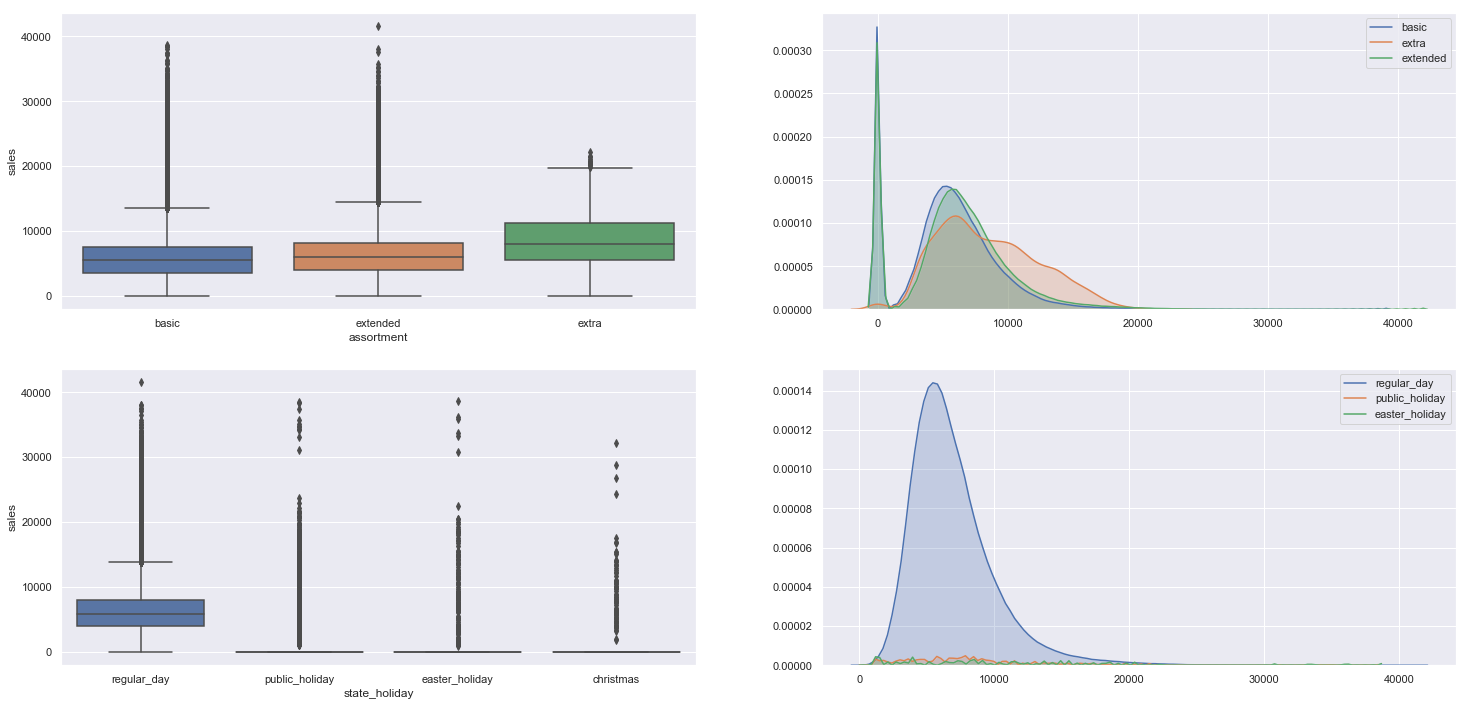

In [62]:
# Assortment X Sales
plt.subplot( 2, 2, 1 )
sns.boxplot( x='assortment', y='sales', data=df3 )

plt.subplot( 2, 2, 2 )
sns.kdeplot( df3[df3['assortment'] == 'basic']['sales'], label='basic', shade=True );
sns.kdeplot( df3[df3['assortment'] == 'extra']['sales'], label='extra', shade=True );
sns.kdeplot( df3[df3['assortment'] == 'extended']['sales'], label='extended', shade=True );

# State Holiday X Sales
plt.subplot( 2, 2, 3 )
sns.boxplot( x='state_holiday', y='sales', data=df3 )

plt.subplot( 2, 2, 4 )
sns.kdeplot( df3[df3['state_holiday'] == 'regular_day']['sales'], label='regular_day', shade=True );
sns.kdeplot( df3[df3['state_holiday'] == 'public_holiday']['sales'], label='public_holiday', shade=True );
sns.kdeplot( df3[df3['state_holiday'] == 'easter_holiday']['sales'], label='easter_holiday', shade=True );

## 3.3. Multivariate Analysis

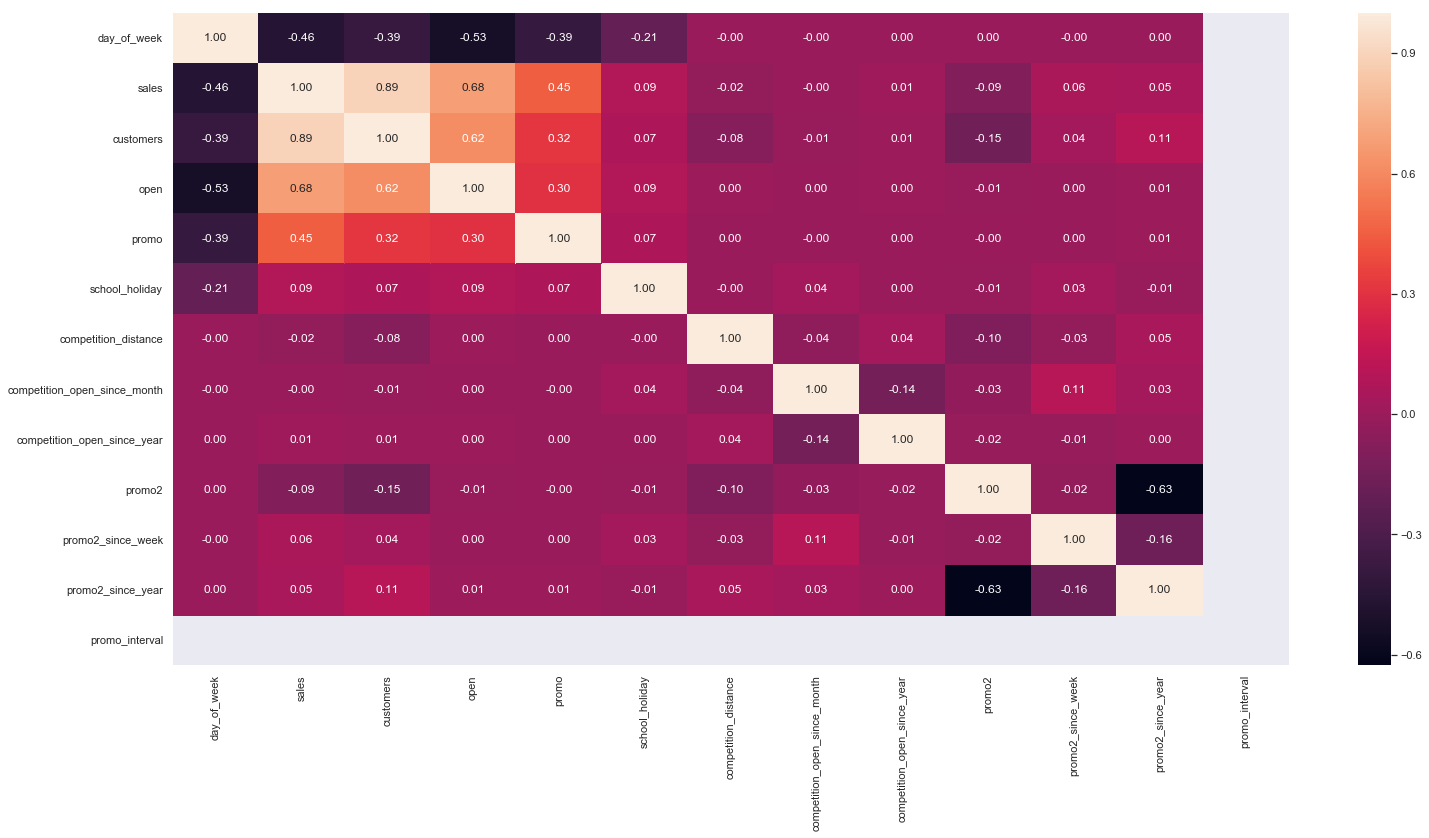

In [63]:
correlation = num_attributes.corr()
sns.heatmap( correlation, annot=True, fmt='.2f' )

plt.show()